In [1]:
# ResNet50 을 이용하여 11가지 이미지 분류
# 전이학습

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub

from matplotlib import font_manager
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [5]:
# 사전 훈련된 모델
model = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5",
                      input_shape = (224,224,3),
                      trainable = False),
        tf.keras.layers.Dense(11, activation = 'softmax')
])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              58331648  
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22539     
Total params: 58,354,187
Trainable params: 22,539
Non-trainable params: 58,331,648
_________________________________________________________________


In [7]:
# 환경설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# 모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = 'C:/AI/photos/train'
valid_dir = 'C:/AI/photos/validation'

train = ImageDataGenerator(rescale=1/255,
                           rotation_range=10,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.1,
                           zoom_range=0.1)

valid = ImageDataGenerator(rescale=1/255)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=5,
                                            shuffle=True,
                                            class_mode='categorical')

valid_generator = train.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode='rgb',
                                            batch_size=BATCH_SIZE,
                                            seed=5,
                                            shuffle=True,
                                            class_mode='categorical')

Found 4046 images belonging to 11 classes.
Found 1006 images belonging to 11 classes.


In [10]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=1)

Epoch 1/10
127/127 [==============================] - 508s 4s/step - loss: 0.6376 - accuracy: 0.7926 - val_loss: 0.3880 - val_accuracy: 0.8608
Epoch 2/10
127/127 [==============================] - 502s 4s/step - loss: 0.2813 - accuracy: 0.9086 - val_loss: 0.3299 - val_accuracy: 0.8787
Epoch 3/10
127/127 [==============================] - 491s 4s/step - loss: 0.2358 - accuracy: 0.9202 - val_loss: 0.3260 - val_accuracy: 0.8827
Epoch 4/10
127/127 [==============================] - 487s 4s/step - loss: 0.1930 - accuracy: 0.9365 - val_loss: 0.3049 - val_accuracy: 0.8887
Epoch 5/10
127/127 [==============================] - 482s 4s/step - loss: 0.1666 - accuracy: 0.9461 - val_loss: 0.3203 - val_accuracy: 0.8877
Epoch 6/10
127/127 [==============================] - 499s 4s/step - loss: 0.1503 - accuracy: 0.9523 - val_loss: 0.2838 - val_accuracy: 0.8907
Epoch 7/10
127/127 [==============================] - 493s 4s/step - loss: 0.1364 - accuracy: 0.9592 - val_loss: 0.3065 - val_accuracy: 0.8966

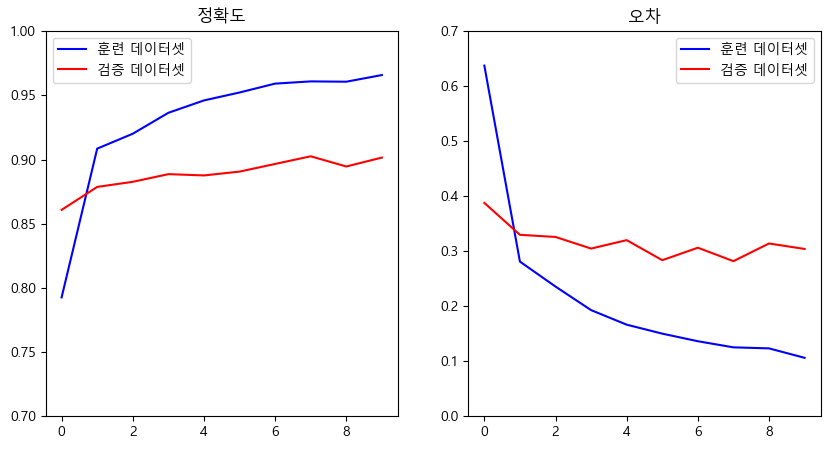

In [17]:
# 모델의 정확도 시각화

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams['font.family'] = font_family        # 글꼴 적용

accuracy = history.history['accuracy']           # 훈련 정확도 추출
val_accuracy = history.history['val_accuracy']   # 검증 정확도 추출

loss = history.history['loss']                   # 훈련 오차 추출
val_loss = history.history['val_loss']           # 검증 오차 추출

epochs = range(len(accuracy))                    # 0~9

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'b-', label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, 'r-', label='검증 데이터셋')
plt.ylim(0.7,1.0)
plt.legend()
plt.title('정확도')

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='훈련 데이터셋')
plt.plot(epochs, val_loss, 'r-', label='검증 데이터셋')
plt.ylim(0.0,0.7)
plt.legend()
plt.title('오차')

plt.show()

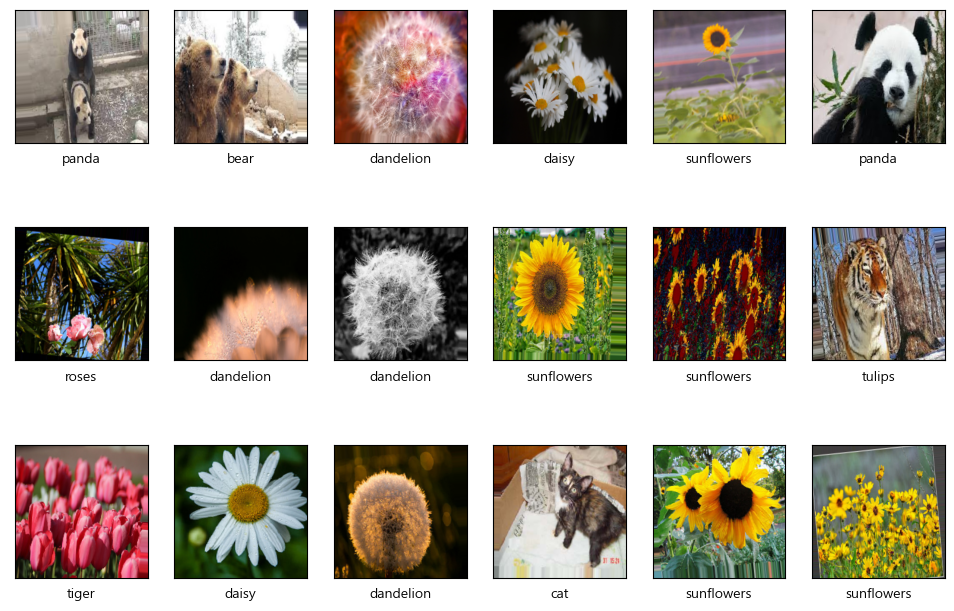

In [19]:
class_names = ['bear','cat','daisy','dandelion','dog','hog',
               'panda','roses','sunflowers','tulips','tiger']
validation, label_batch = next(iter(valid_generator))      # 반복(반복자(리스트 반환 가능 객체)), 
prediction_values = np.argmax(model.predict(validation), axis=-1)   # 검증데이터를 이용해서 예측 

fig = plt.figure(figsize=(12,8))

for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.imshow(validation[i])
    plt.xticks([])
    plt.yticks([])
    if prediction_values[i] == np.argmax(label_batch[i]):
        plt.xlabel(class_names[prediction_values[i]])
    else :
        plt.xlabel(class_names[1 - prediction_values[i]])
    
plt.show()